In [3]:
import pandas as pd
data = pd.read_csv('./corpus_0.csv')

In [4]:
from gensim.corpora import Dictionary

# 假设my_corpus是一个包含文档的列表，每个文档都是一个字符串
my_corpus = data['corpus'].tolist()

# 将文档转换为单词列表
my_documents = [doc.split() for doc in my_corpus]

# 创建字典对象
my_dictionary = Dictionary(my_documents)

# 输出字典对象的大小
print(len(my_dictionary))


/root/miniconda3/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


20392


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# 输出每个主题的关键词
def print_top_words(model, feature_name, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d" % topic_idx)
        topic_w = " ".join([feature_name[i] for i in topic.argsort()[:-n_top_words - 1: -1]])
        tword.append(topic_w)
        print(topic_w)
    return tword


In [7]:
# 提取1000个特征词语
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df=0.5,
                                min_df=10)
tf = tf_vectorizer.fit_transform(data['corpus'].astype('U'))

In [8]:
n_topics = 9
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                                random_state=0)
lda.fit(tf)




LatentDirichletAllocation(doc_topic_prior=0.1, learning_offset=50, max_iter=50,
                          n_components=9, random_state=0,
                          topic_word_prior=0.01)

In [11]:
doc_topic_dist = lda.transform(tf)

# 获取学习到的主题-词项矩阵
topic_term_matrix = lda.components_

In [9]:
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0
电影 这部 军事 海豹 人员 来自 真实 程度 自杀 武器
Topic #1
研究 家务活 日本 成为 伟大 死亡率 进行 时间 癌症 发明
Topic #2
艾滋病 感染 感染者 了解 报告 需要 预防 检测 歧视 世界
Topic #3
加油 宝宝 出现 治疗 不能 皮肤 发热 症状 幼儿 急疹
Topic #4
周期 没有 很多 问题 谴责 不是 现在 巴菲特 觉得 大家
Topic #5
鼠疫 可能 心脏 需要 问题 视频 一下 猝死 心电图 死亡
Topic #6
艾滋病 感染 世界 报告 感染者 病例 发现 人群 青年 数据
Topic #7
感染 抗生素 咳嗽 医生 细菌 证据 咽痛 疾病 使用 感冒
Topic #8
胃炎 胃癌 萎缩性 慢性 患者 症状 胃镜 导致 没有 胃黏膜


/root/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
import numpy as np
topics=lda.transform(tf)
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("./data_topic.xlsx",index=False)

In [10]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()


In [29]:
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(pic)


/root/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is depreca

In [25]:
from IPython.core.display import HTML
HTML("<script src='https://fastly.bootcss.com/require.js/2.3.4/require.min.js'></script>")

In [26]:
pyLDAvis.display(pic)

In [7]:
import matplotlib.pyplot as plt

In [95]:
plexs = []
scores = []
n_max_topics = 11
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10


In [40]:
# 假设my_corpus是一个包含文档的列表，每个文档都是一个字符串
my_corpus = data['corpus'].tolist()

# 将文档转换为单词列表
texts  = [doc.split() for doc in my_corpus]

In [41]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [85]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import CoherenceModel, LdaModel
from gensim import models

In [86]:
goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary,
     iterations=50, num_topics=9)

In [71]:
np.random.seed(1)
goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary,
     iterations=50, num_topics=9)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary,
     iterations=50, num_topics=10)
goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, 
       dictionary=dictionary, coherence='u_mass')
badcm = CoherenceModel(model=badLdaModel, corpus=corpus,
       dictionary=dictionary, coherence='u_mass')
print("Coherence Score: ", goodcm.get_coherence())
print("Coherence Score: ", badcm.get_coherence())

Coherence Score:  -1.9761625032766803
Coherence Score:  -2.1815020668297236


In [87]:
Coherence = []

In [89]:
for i in range(1,11):
    print(i)
    ALdaModel = LdaModel(corpus=corpus, id2word=dictionary,iterations=50, num_topics= i)
    cm = CoherenceModel(model= ALdaModel, corpus=corpus,dictionary=dictionary, coherence='u_mass')
    
    Coherence.append(cm.get_coherence())

1
2
3
4
5
6
7
8
9
10


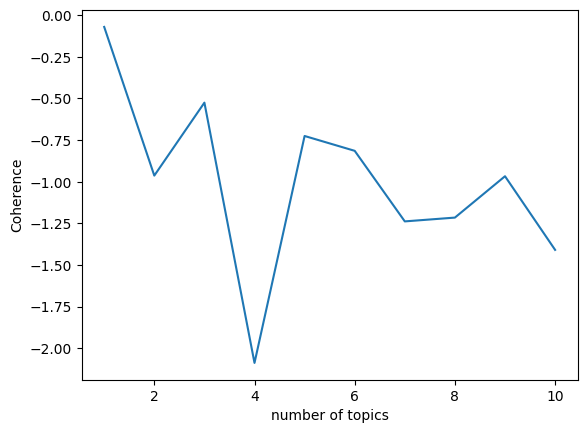

In [96]:
n_t=10#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,Coherence[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("Coherence")
plt.show()

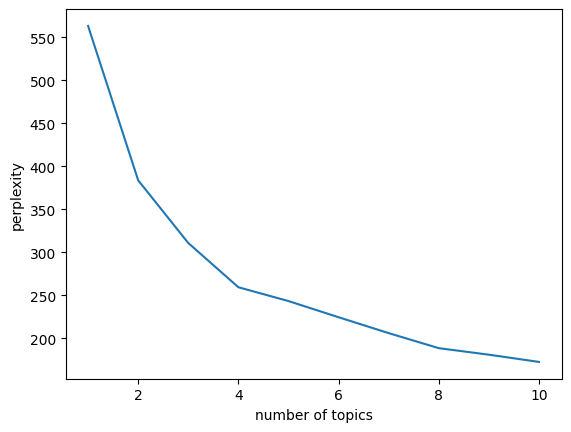

In [97]:
n_t=10
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

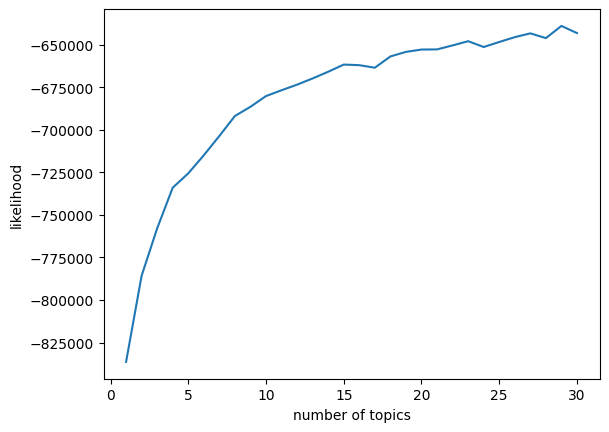

In [10]:
n_t=30#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,scores[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("likelihood")
plt.show()